In [1]:
include("../EuclidElements.jl");

# Book 1

## Proposition 3 

Given 2 unequal straight lines, to cut off from the greater a straight line equal to the less...

### Base case

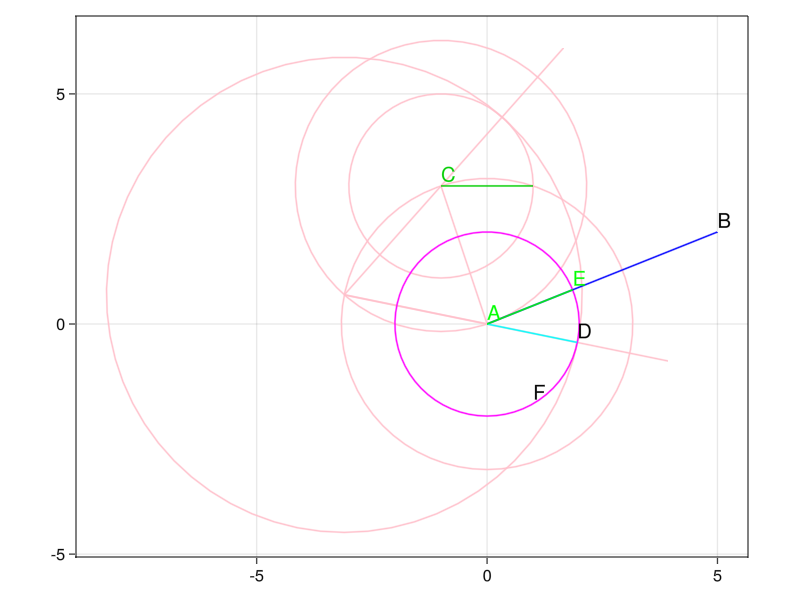

In [2]:
A = Point2f(0, 0)
B = Point2f(5, 2)
C = [Point2f(-1, 3), Point2f(1, 3)]

D_lines = EqualLines_from(A, C[1], C[2])

D = Point(D_lines)

r_DEF = norm(A-D)
F = Point2f(r_DEF/2, -r_DEF*(√3)/2)
v = B - A
u = v / norm(v)
E = A + r_DEF*u

#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect())

# Draw all those lines.... meeeep
draw_lines(D_lines)

DEF = lines!(Circle(A, r_DEF),color=:magenta)

AB = lines!([A,B], color=:blue)
Cline = lines!(C, color=:green3)
AD = lines!([A,D], color=:cyan)
AE = lines!([A,E], color=:green1)

#Now draw the point labels
Apoint = text!(A, text="A", color=:green1)
Bpoint = text!(B, text="B")
C1point = text!(C[1], text="C", color=:green3)
Dpoint = text!(D, text="D", color=:black)
Epoint = text!(E, text="E", color=:green1)
Fpoint = text!(F, text="F", color=:black)

#Draw and show the chart :)
current_figure()

### Functions

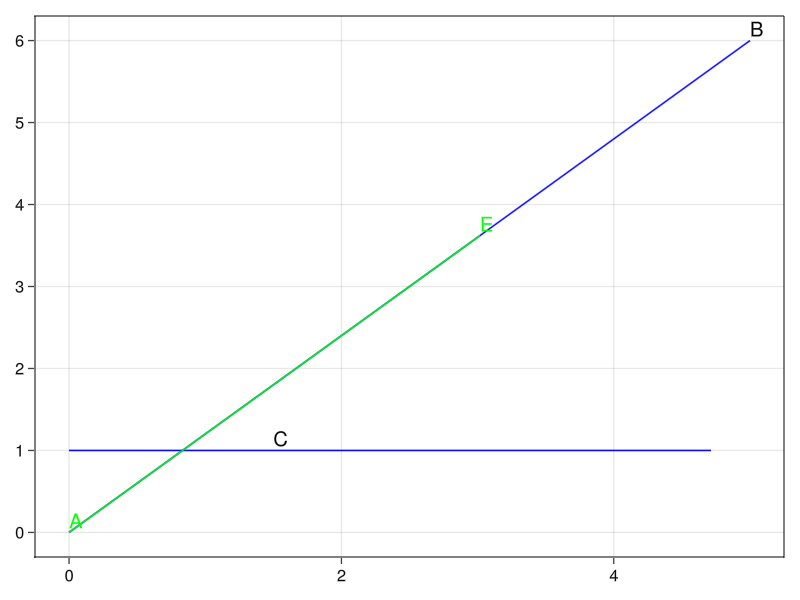

In [3]:
# Find the point that would cut a line equal 
function cut_line(A1::Point2, B1::Point2, A2::Point2, B2::Point2)
    # Get D to form a straight line AD the same length as C
    D = equal_line(A1, A2, B2)

    # Define circle DEF at center A, with radius AD
    r_DEF = norm(A1-D)
    v = B1 - A1
    u = v / norm(v)
    E_x,E_y = A1 + r_DEF*u
    Point2(E_x,E_y)
end

# Let AB and C be 2 lines, the former longer
A = Point2f(0, 0)
B = Point2f(5, 6)
C = [Point2f(0, 1), Point2f(3π/2, 1)]

#Cut AB to AE!
E = cut_line(A, B, C[1], C[2])

#setup the chart space...
f = Figure()
ax = Axis(f[1,1])

# Draw the lines
AB = lines!([A,B], color=:blue)
Cline = lines!(C, color=:blue)
AE = lines!([A,E], color=:green1)

#Now draw the point labels
Apoint = text!(A, text="A", color=:green1)
Bpoint = text!(B, text="B")
Cpoint = text!(C[1] + [1.5,0], text="C")
Epoint = text!(E, text="E", color=:green1)

#Draw and show the chart :)
current_figure()

### ANIMATION

In [4]:
# Let AB and C be 2 lines, the former longer
A = Observable(Point2f(0, 0))
B_0 = Point2f(2,3)
B = Observable(B_0)
C1 = Observable(Point2f(-1,3))
C2_0 = Point2f(1,3)
C2 = Observable(C2_0)

# This is to get D and F for the animation -- it's already in cut_line, but we wanna draw circles and lines!!
D = @lift(equal_line($A, $C1, $C2))
r_DEF = @lift(norm($A-$D))
F = @lift(Point2f($r_DEF / 2, -1 * $r_DEF * (√3)/2))

#Cut AB to AE!
E = @lift(cut_line($A, $B, $C1, $C2))


#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect())
xlims!(ax, -7,8)
ylims!(ax, -7,8)

#Draw it!
AB = lines!(@lift([$A,$B]), color=:blue)
Cline = lines!(@lift([$C1,$C2]), color=:blue)
AD = lines!(@lift([$A,$D]), color=:purple)
DEF = lines!(@lift(Circle($A, $r_DEF)),color=:pink)
AE = lines!(@lift([$A,$E]), color=:green1)

#Now draw the point labels
Apoint = text!(A, text="A", color=:green1)
Bpoint = text!(B, text="B")
Cpoint = text!(@lift($C1 .+ [1.5,0]), text="C")
Dpoint = text!(D, text="D")
Epoint = text!(E, text="E", color=:green1)
Fpoint = text!(F, text="F")

# Draw the animation!
framerate = 24
d_s = 6
timestamps = range(0,2π, step=2π/(d_s*framerate))

record(f, "Euclid-I-3.gif", timestamps; framerate=framerate) do t
    B_x, B_y = [cos(t) sin(t); -sin(t) cos(t)]*B_0
    new_B = Point2f(B_x,B_y)
    sup_B = continue_line(A[], new_B, sin(t)*2)
    B[] = new_B

    sup_C2 = continue_line(C1[], C2_0, sin(t))
    C2[] = sup_C2
end;

![animation](Euclid-I-3.gif)

In [5]:
A_0 = Point2f(0, 0)
A = Observable(A_0)
B_0 = Point2f(2,3)
B = Observable(B_0)
C1_0 = Point2f(-1,3)
C1 = Observable(C1_0)
C2_0 = Point2f(1,3)
C2 = Observable(C2_0)

D_lines = @lift(EqualLines_from($A, $C1, $C2))

r_DEF = @lift(norm($A-Point($D_lines)))
F = @lift(Point2f($r_DEF/2, -$r_DEF*(√3)/2))
v = @lift($B - $A)
u = @lift($v / norm($v))
E = @lift($A + $r_DEF*$u)

#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect())
xlims!(ax, -10,10)
ylims!(ax, -10,10)

# Draw all those lines.... meeeep
draw_lines(D_lines)

AB = lines!(@lift([$A,$B]), color=:blue)
Cline = lines!(@lift([$C1,$C2]), color=:green3)
AE = lines!(@lift([$A,$E]), color=:green1)
AD = lines!(@lift([$A,Point($D_lines)]), color=:grey56)
DEF = lines!(@lift(Circle($A, $r_DEF)),color=:lightblue)
AE = lines!(@lift([$A,$E]), color=:green1)

#Now draw the point labels
Apoint = text!(A, text="A", color=:green1)
Bpoint = text!(B, text="B", color=:blue)
C1point = text!(C1, text="C", color=:green3)
Dpoint = text!(@lift(Point($D_lines)), text="D", color=:grey56)
Epoint = text!(E, text="E", color=:green1)
Fpoint = text!(F, text="F", color=:lightblue)

# Draw the animation!
framerate = 24
d_s = 6
timestamps = range(0,2π, step=2π/(d_s*framerate))

record(f, "Euclid-I-3-fade.gif", timestamps; framerate=framerate) do t
    B_x, B_y = [cos(t) sin(t); -sin(t) cos(t)]*B_0
    new_B = Point2f(B_x,B_y)
    sup_B = continue_line(A[], new_B, sin(t)*2)
    B[] = new_B

    C1_x, C1_y = [cos(t) -sin(t); sin(t) cos(t)]*C1_0
    new_C1 = Point2f(C1_x, C1_y)
    rotate_C2 = [cos(t) sin(t); -sin(t) cos(t)]*(C2_0-C1_0) + new_C1
    sup_C2 = continue_line(new_C1, rotate_C2, sin(t))
    C1[] = new_C1
    C2[] = sup_C2
end;

![animation](Euclid-I-3-fade.gif)